<a href="https://colab.research.google.com/github/thien1892/Deep-Learning-for-Computer-Vision/blob/main/1_5_How_to_Load_Large_Datasets_From_Directories_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Load Large Datasets From Directories with Keras
# 1. Dataset Directory Structure

In [1]:
import tensorflow as tf
keras = tf.keras

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)
zip_dir

68616192/68606236 [==============================] - 1s 0us/step


'/root/.keras/datasets/cats_and_dogs_filterted.zip'

In [3]:
import zipfile
with zipfile.ZipFile(zip_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [28]:
import os
def list_files(startpath, num_file):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = '-' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = '-' * 4 * (level + 1)
        for f in files[: num_file]:
            print('{}{}'.format(subindent, f))

In [29]:
list_files('/content/cats_and_dogs_filtered', 2)

cats_and_dogs_filtered/
----vectorize.py
----validation/
--------dogs/
------------dog.2368.jpg
------------dog.2232.jpg
--------cats/
------------cat.2187.jpg
------------cat.2425.jpg
----train/
--------dogs/
------------dog.438.jpg
------------dog.502.jpg
--------cats/
------------cat.980.jpg
------------cat.999.jpg


# 2. How to Progressively Load Images
- Let’s take a closer look at each step. The constructor for the ImageDataGenerator contains
many arguments to specify how to manipulate the image data after it is loaded, including
pixel scaling and data augmentation. We do not need any of these features at this stage, so
configuring the ImageDataGenerator is easy
- Next, an iterator is required to progressively load images for a single dataset. This requires
calling the flow from directory() function and specifying the dataset directory, such as the
train, test, or validation directory. The function also allows you to configure more details related
to the loading of images. Of note is the target size argument that allows you to load all
images to a specific size, which is often required when modeling. The function defaults to square
images with the size (256, 256)
- The function also allows you to specify the type of classification task via the class mode
argument, specifically whether it is ‘binary’ or a multiclass classification ‘categorical’. The
default batch size is 32, which means that 32 randomly selected images from across the classes
in the dataset will be returned in each batch when training. Larger or smaller batches may be
desired. You may also want to return batches in a deterministic order when evaluating a model,
which you can do by setting shuffle to False. The subdirectories of images, one for each
class, are loaded by the flow from directory() function in alphabetical order and assigned
an integer for each class. For example, the subdirectory blue comes before red alphabetically,
therefore the class labels are assigned the integers: blue=0, red=1. This can be changed via
the classes argument in calling flow from directory() when training the model

In [56]:
# example of progressively loading images from file
from keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator()
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('cats_and_dogs_filtered/train', class_mode='binary', batch_size=64, shuffle= True)
val_it = datagen.flow_from_directory('cats_and_dogs_filtered/validation/', class_mode='binary', batch_size= 64)
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Batch shape=(64, 256, 256, 3), min=0.000, max=255.000


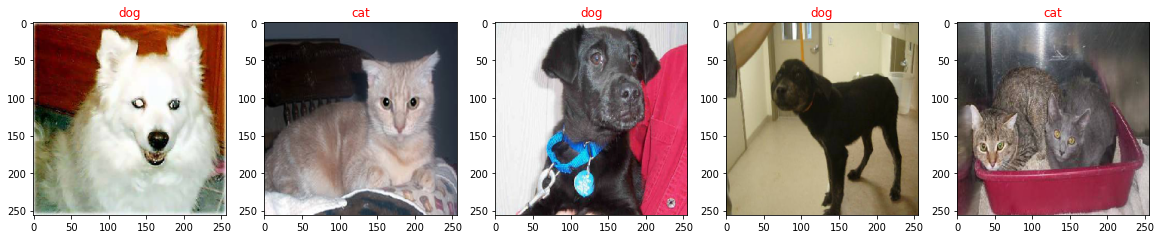

In [58]:
import matplotlib.pyplot as plt
import numpy as np
label = ['cat', 'dog']
plt.figure(figsize=(20,30))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(np.asarray(batchX[i], dtype=np.int))
  plt.title(label[int(batchy[i])], color = 'r')
plt.show()

# Extensions
This section lists some ideas for extending the tutorial that you may wish to explore.
- Your Own Images. Design a small dataset with just one or a few images in each class
and practice loading it using the Keras API.
- Iterate and Plot. Experiment with the image dataset iterator by retrieving and plotting
batches of images from a dataset.
- Apply to Dataset. Locate a small image dataset and organize into appropriate directories
and load and iterate over it using the Keras API